In [51]:
%matplotlib inline
from k2utils import *
from vj_processing import *
from matplotlib.pyplot import subplots, subplots_adjust, savefig

In [2]:
imu = CCD(campaign=8, channel=2, module=6, field='FLUX')
mu = CCD(campaign=8, channel=1, module=8, field='FLUX') # actually a half-M
M = CCD(campaign=8, channel=2, module=11, field='FLUX')


In [3]:
objects = searchProposal('GO', 8)

In [4]:
objs = {ccd:dict(filter(moduleFilter(ccd), objects.items())) for ccd in (imu, mu, M)}

In [37]:
EPICS = {
    imu:[220289355, 220284690, 220252978],
    mu:[220491531,220497873,220484580],
    M:[220212670, 220198775, 220213521]
}

. . . . . . . . .


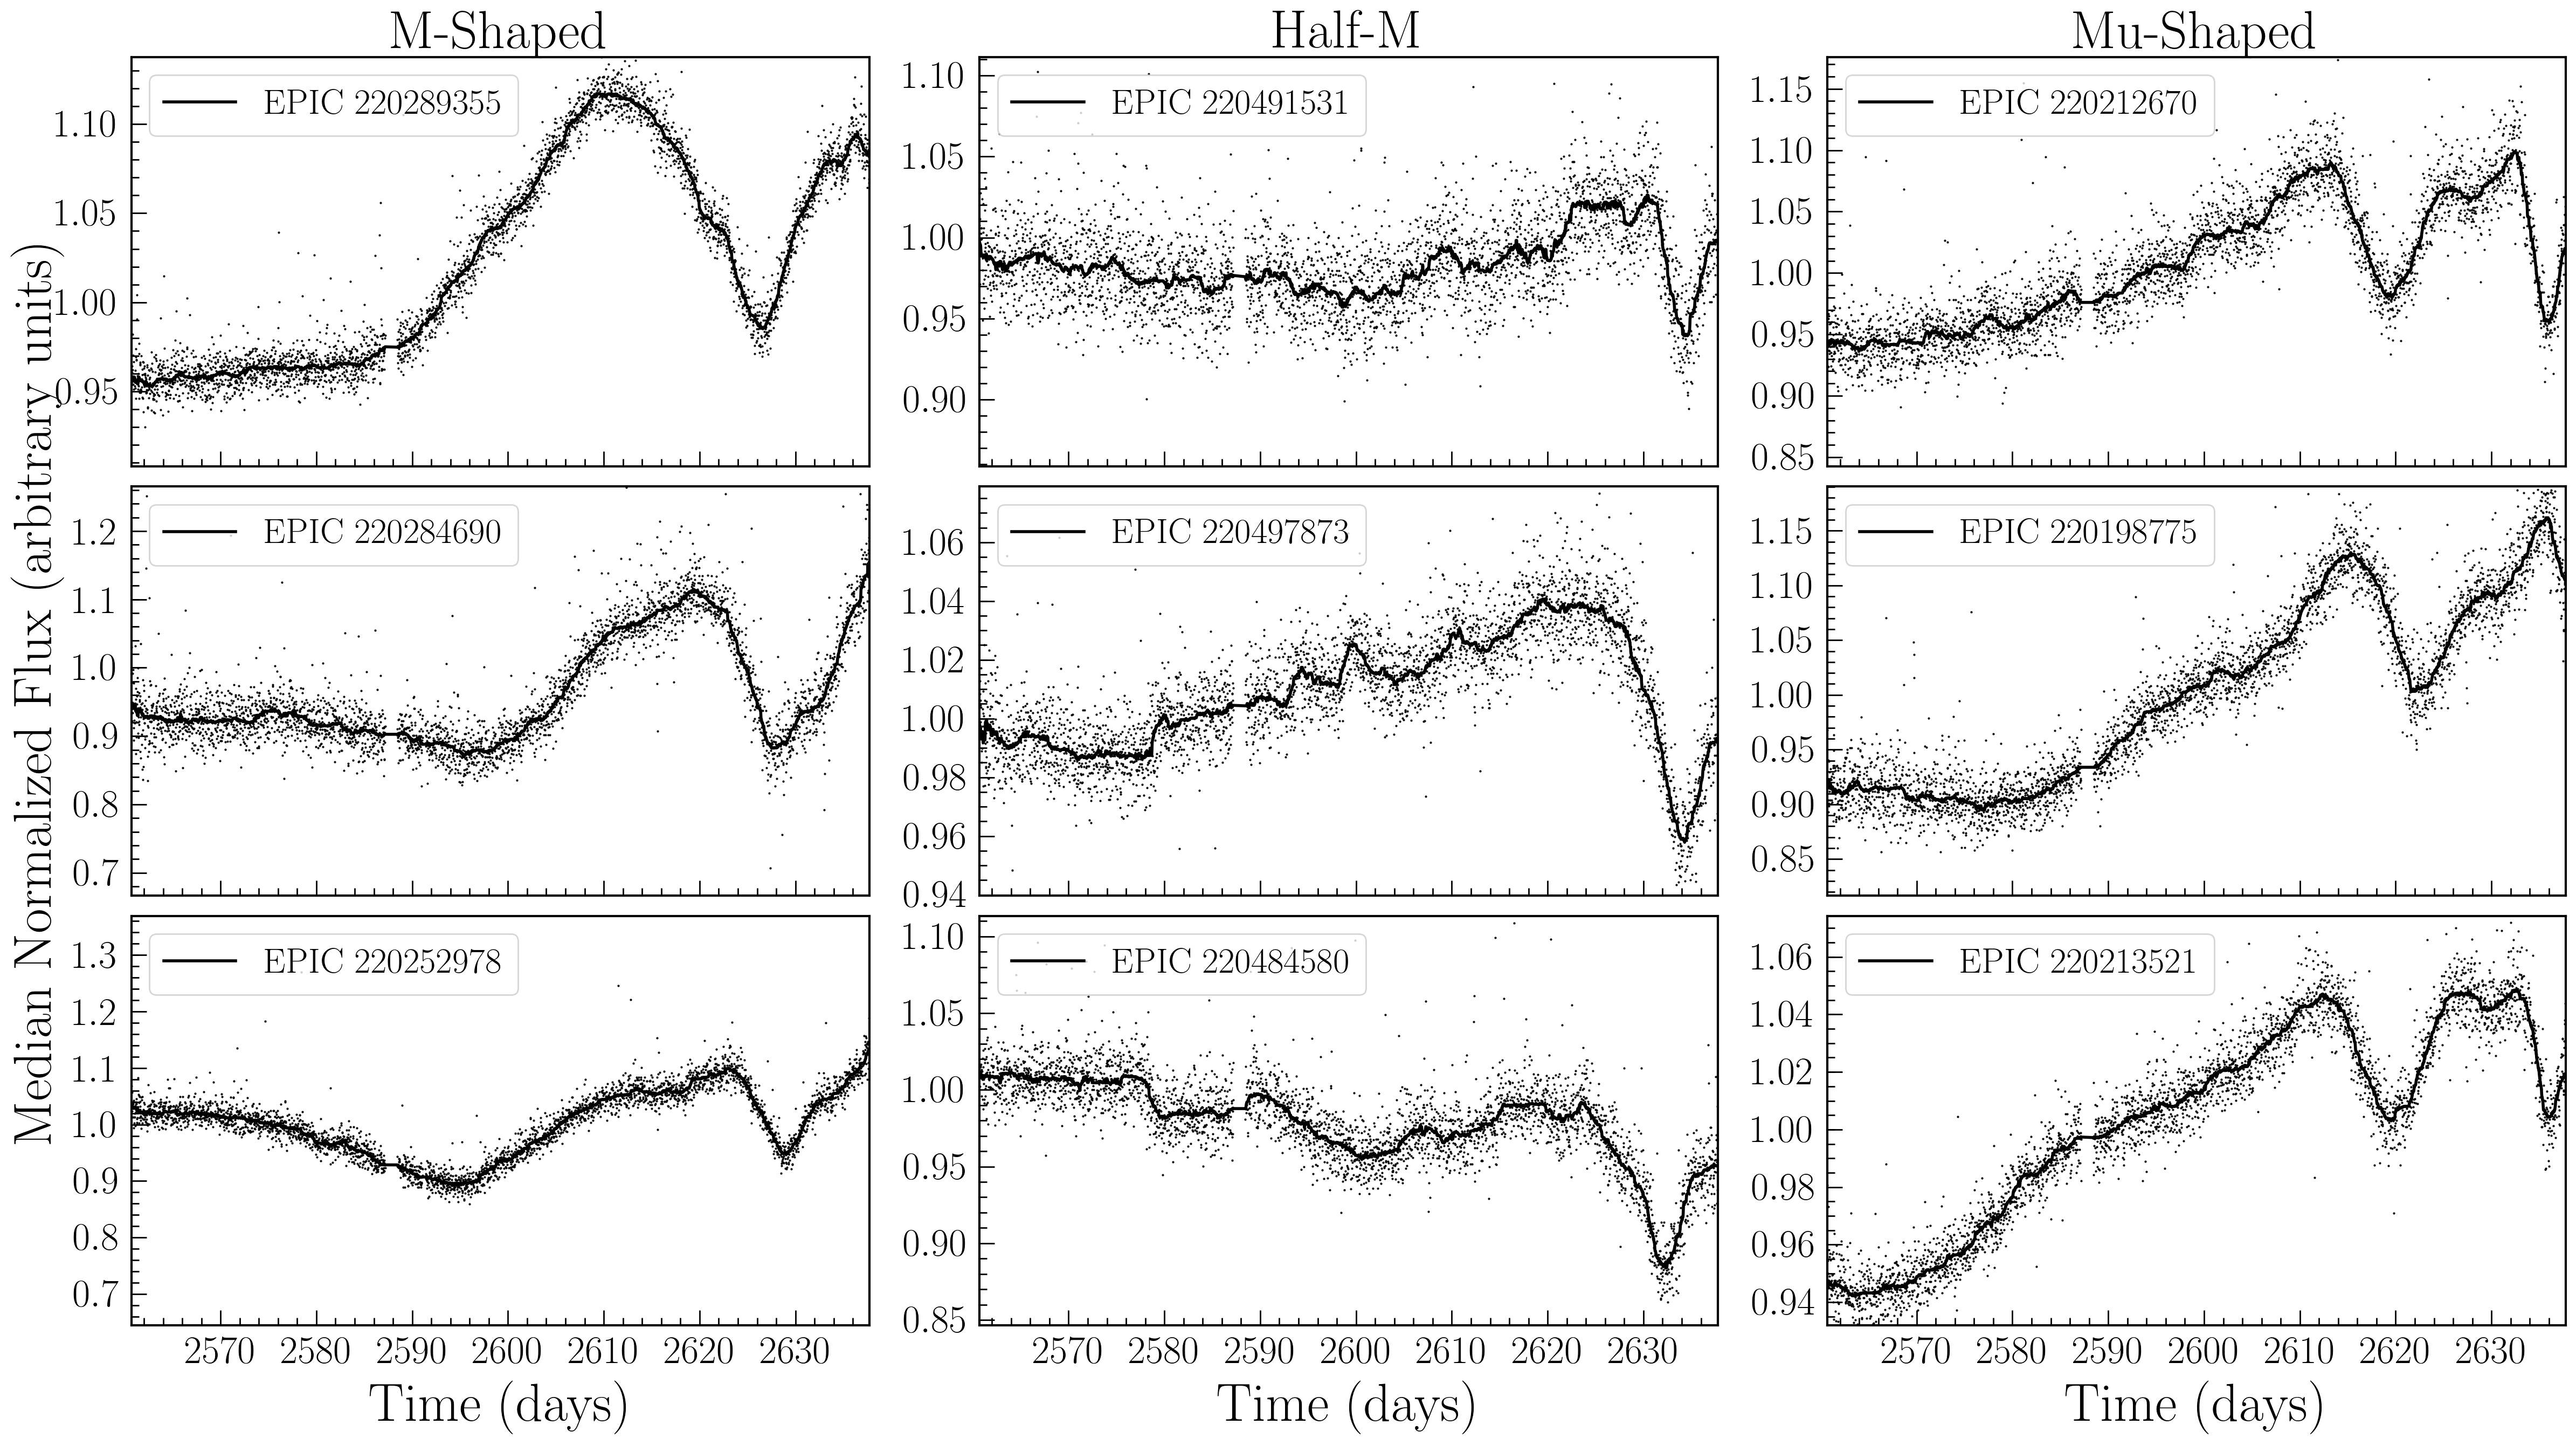

In [63]:
fig, ax = subplots(3,3, figsize=(24,13.5), dpi=200, sharex=True)

for i, (ccd, title) in enumerate(zip([imu, mu, M], ('M-Shaped', 'Half-M', 'Mu-Shaped'))):
    ax[0][i].set_title(title, fontsize=36)
    epics = EPICS[ccd]
    epics = sorted(epics, key=lambda e:-objects[e][0])
    mags = [objects[e][0] for e in epics]
    urls = [get_vj_url(e,8) for e in epics]
    for j, (hdu,epic, mag) in enumerate(zip(fits_downloader(urls), epics, mags)):
        t = hdu[1].data['T']
        f = hdu[1].data['FCOR']
        plotNiceIntervals(ax[j][i], t, f, label='EPIC %i'% (epic), N=60, color='k')
        m = np.nanmean(f)
        s = np.nanstd(f)
        ax[j][i].legend(fontsize=24, loc=2, numpoints=1)
        ax[j][i].set_ylim(m-2*s, m+2*s)
        ax[j][i].set_xlim(t[0], t[-1])
        
        for tick in ax[j][i].xaxis.get_major_ticks():
            tick.label.set_fontsize(26) 

        for tick in ax[j][i].yaxis.get_major_ticks():
            tick.label.set_fontsize(26) 
        print '.',
    ax[-1][i].set_xlabel('Time (days)', fontsize=36)
ax[1][0].set_ylabel('Median Normalized Flux (arbitrary\ units)', fontsize=36)
fig.tight_layout()
subplots_adjust(hspace=0.05)
savefig('../plots/PatternClassification.png')

In [22]:
def quick_view(EPIC):
    url = get_vj_url(EPIC, 8)
    hdu = next(fits_downloader([url]))
    fig, ax = subplots(1,1)
    plotNiceIntervals(ax, hdu[1].data['T'], hdu[1].data['FRAW'], label='EPIC %i' % EPIC, N=60)
    ax.legend()
    m = np.nanmean(hdu[1].data['FRAW'])
    s = np.nanstd(hdu[1].data['FRAW'])
    ax.set_ylim(m-2*s, m+2*s)
    print EPIC
    
def quick_views(*EPICS):
    for epic in EPICS:
        quick_view(epic)


220289355
220284690
220252978


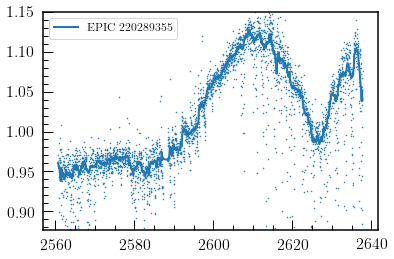

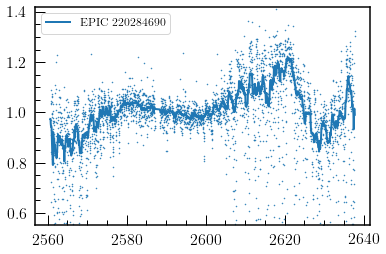

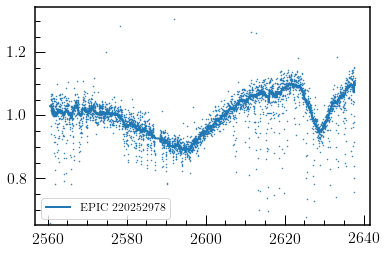

In [31]:


EPICS = [220289355, 220284690, 220252978]
quick_views(*EPICS)

220491531
220497873
220484580


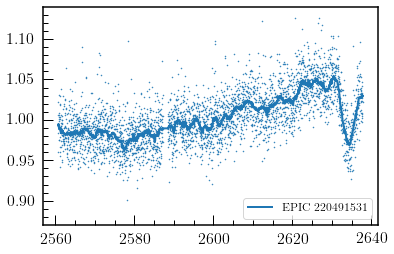

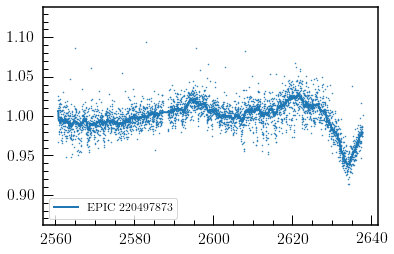

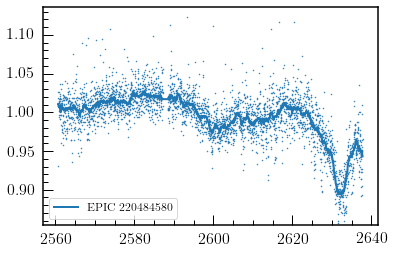

In [26]:
temp = [i[0] for i in sorted(objs[mu].items(), key=lambda x: x[1][0])[::-1]][:15]
#quick_views(*temp)

EPICS = [220491531,220497873,220484580]
quick_views(*EPICS)

220212670
220198775
220213521


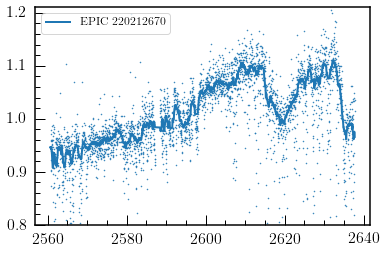

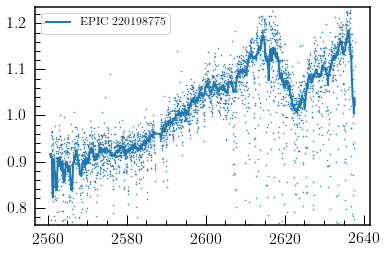

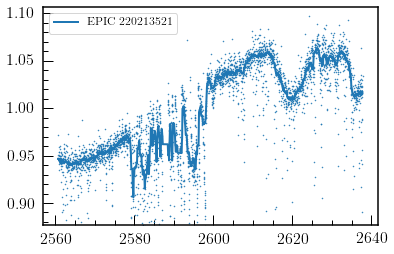

In [32]:
temp = [i[0] for i in sorted(objs[M].items(), key=lambda x: x[1][0])[::-1]][15:25]
#quick_views(*temp)
EPICS = [220212670, 220198775, 220213521]
quick_views(*EPICS)